In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("C:/Users/user/Desktop/Social_media_data_cleaned.csv")
df.head()

,Unnamed: 0,Age,Gender,Year,Residence,WhatsApp,Facebook,Instagram,TikTok,Twitter,...,Unable_to_control,Stressed,Handling_problems,Going_right,Not_coping,Controlling_irritations,On_top,Angered,Difficulties_in_overcoming,Influences_stress
0,0,19,Female,1st Year,On-campus,0.0,1.0,0.0,0.0,0.0,...,2.0,3.0,2.0,2.0,3.0,2.0,1.0,0.0,2.0,Not Sure
1,1,23,Male,4th Year,Off-campus,1.0,0.0,0.0,1.0,0.0,...,3.0,1.0,4.0,1.0,3.0,2.0,4.0,4.0,1.0,Not Sure
2,2,22,Female,4th Year,On-campus,1.0,0.0,1.0,1.0,0.0,...,3.0,4.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,Yes
3,3,23,Male,4th Year,Off-campus,1.0,1.0,0.0,0.0,0.0,...,0.0,3.0,4.0,2.0,2.0,1.0,3.0,4.0,0.0,No
4,4,24,Female,4th Year,Off-campus,1.0,0.0,0.0,0.0,0.0,...,1.0,2.0,3.0,3.0,2.0,3.0,1.0,2.0,1.0,No


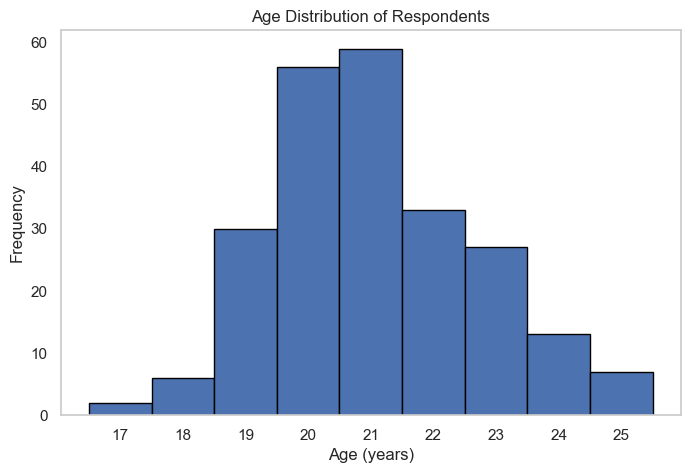

In [2]:
#Descriptive Statistics for Age
age_summary = df["Age"].describe()
age_summary

plt.figure(figsize=(8,5))
plt.grid(False)
plt.hist(df["Age"], bins=range(df["Age"].min(), df["Age"].max() + 2), 
         edgecolor='black', align='left')
plt.xticks(range(df["Age"].min(), df["Age"].max() + 1))
plt.title("Age Distribution of Respondents")
plt.xlabel("Age (years)")
plt.ylabel("Frequency")
plt.show()

In [3]:
#Sex Distribution
sex_freq = df["Gender"].value_counts()
print("Frequency Table:")
print(sex_freq)

sex_percent = df["Gender"].value_counts(normalize=True) * 100
print("\nPercentage Table (%):")
print(sex_percent)

Frequency Table:
Gender
Male      150
Female     83
Name: count, dtype: int64

Percentage Table (%):
Gender
Male      64.377682
Female    35.622318
Name: proportion, dtype: float64


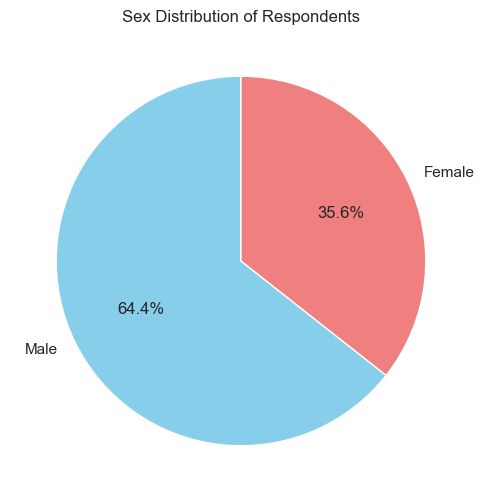

In [4]:
plt.figure(figsize=(6,6))
plt.pie(
    sex_freq.values,
    labels=sex_freq.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=["skyblue", "lightcoral"]
)
plt.title("Sex Distribution of Respondents")
plt.show()

In [5]:
#Year of Study
year_freq = df["Year"].value_counts().sort_index()
print("Frequency Table:")
print(year_freq)

year_percent = df["Year"].value_counts(normalize=True).sort_index() * 100
print("\nPercentage Table (%):")
print(year_percent)

Frequency Table:
Year
1st Year    63
2nd Year    55
3rd Year    57
4th Year    58
Name: count, dtype: int64

Percentage Table (%):
Year
1st Year    27.038627
2nd Year    23.605150
3rd Year    24.463519
4th Year    24.892704
Name: proportion, dtype: float64


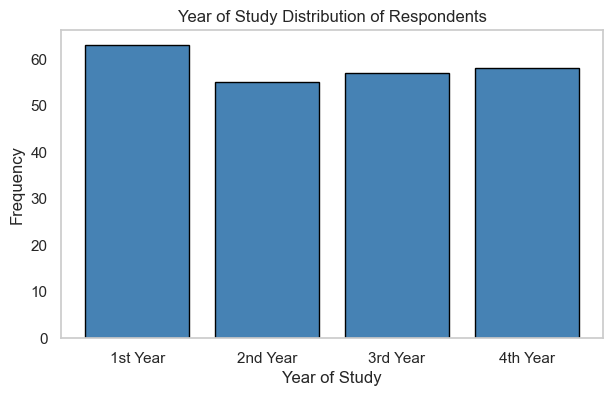

In [6]:
plt.figure(figsize=(7,4))
plt.grid(False)
plt.bar(year_freq.index, year_freq.values, color="steelblue", edgecolor="black")
plt.title("Year of Study Distribution of Respondents")
plt.xlabel("Year of Study")
plt.ylabel("Frequency")
plt.show()

In [7]:
#Place of Residence
res_freq = df["Residence"].value_counts()
print("Frequency Table:")
print(res_freq)


res_percent = df["Residence"].value_counts(normalize=True) * 100
print("\nPercentage Table (%):")
print(res_percent)

Frequency Table:
Residence
Off-campus    134
On-campus      99
Name: count, dtype: int64

Percentage Table (%):
Residence
Off-campus    57.51073
On-campus     42.48927
Name: proportion, dtype: float64


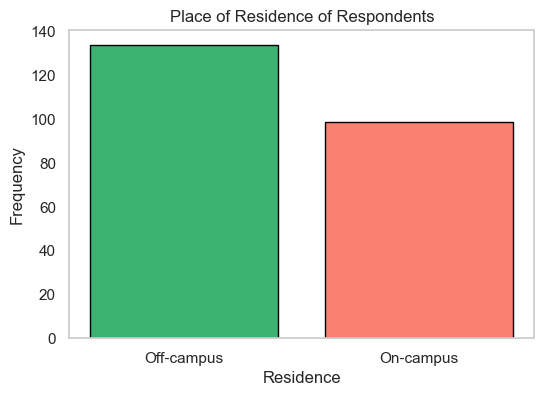

In [8]:
plt.figure(figsize=(6,4))
plt.grid(False)
plt.bar(res_freq.index, res_freq.values, color=["mediumseagreen", "salmon"], edgecolor="black")
plt.title("Place of Residence of Respondents")
plt.xlabel("Residence")
plt.ylabel("Frequency")
plt.show()

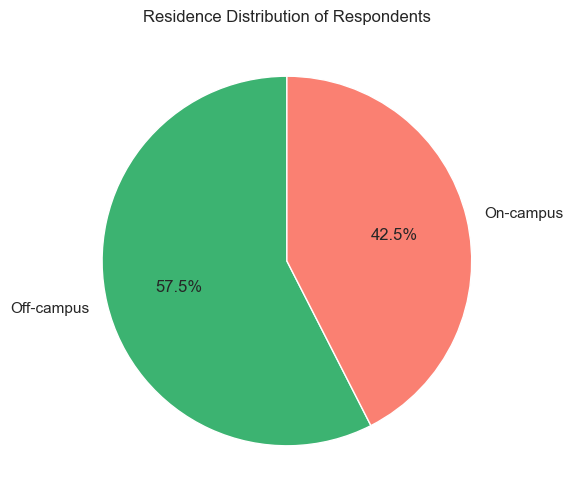

In [9]:
plt.figure(figsize=(6,6))
plt.pie(
    res_freq.values,
    labels=res_freq.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=["mediumseagreen", "salmon"]
)
plt.title("Residence Distribution of Respondents")
plt.show()

In [10]:
#Objective 1
#Social media platform used
platforms = ["WhatsApp", "Facebook", "Instagram", "TikTok", "Twitter"]

df_platforms = df[platforms].replace({"Yes": 1, "No": 0, "yes": 1, "no": 0})

platform_freq = df_platforms.sum().sort_values(ascending=False)
print("Frequency of Users Per Platform:")
print(platform_freq)

platform_percent = (df_platforms.mean() * 100).sort_values(ascending=False)
print("\nPercentage of Users Per Platform (%):")
print(platform_percent)

Frequency of Users Per Platform:
WhatsApp     209.0
TikTok       145.0
Facebook     104.0
Instagram    102.0
Twitter       52.0
dtype: float64

Percentage of Users Per Platform (%):
WhatsApp     89.699571
TikTok       62.231760
Facebook     44.635193
Instagram    43.776824
Twitter      22.317597
dtype: float64


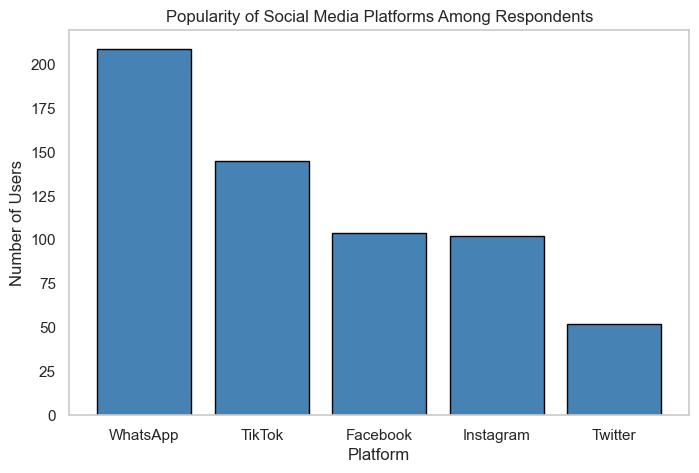

In [11]:
plt.figure(figsize=(8,5))
plt.grid(False)
plt.bar(platform_freq.index, platform_freq.values, color="steelblue", edgecolor="black")
plt.title("Popularity of Social Media Platforms Among Respondents")
plt.xlabel("Platform")
plt.ylabel("Number of Users")
plt.show()

In [12]:
#Hours Spent on social media
freq = df["hours_per_day"].value_counts().sort_index()

percent = df["hours_per_day"].value_counts(normalize=True).sort_index() * 100


hours_table = pd.DataFrame({
    "Frequency": freq,
    "Percent": percent.round(1)
})


print(hours_table)


total_row = pd.DataFrame({"Frequency": [len(df)], "Percent": [100.0]}, index=["Total"])
print("\n", pd.concat([hours_table, total_row]))


                  Frequency  Percent
hours_per_day                       
10 hours or more         34     14.6
1–3 hours                50     21.5
4–6 hours                88     37.8
7-9 hours                60     25.8
Less than 1 hour          1      0.4

                   Frequency  Percent
10 hours or more         34     14.6
1–3 hours                50     21.5
4–6 hours                88     37.8
7-9 hours                60     25.8
Less than 1 hour          1      0.4
Total                   233    100.0


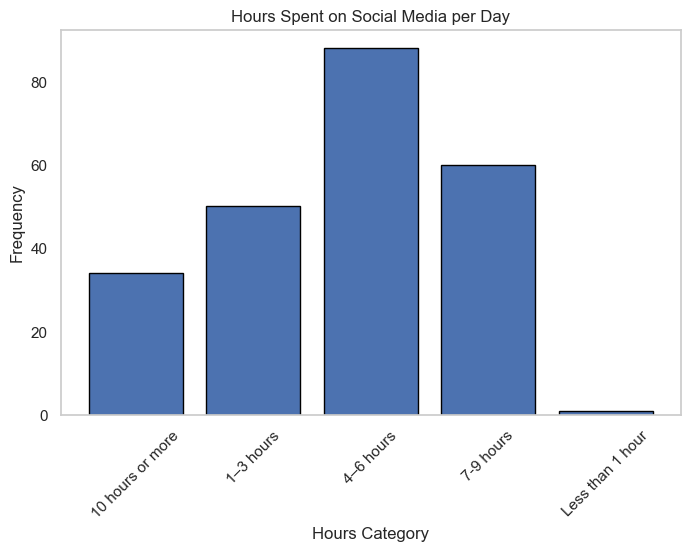

In [13]:
plt.figure(figsize=(8,5))
plt.grid(False)
plt.bar(hours_table.index, hours_table["Frequency"], edgecolor="black")
plt.title("Hours Spent on Social Media per Day")
plt.xlabel("Hours Category")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [14]:
mapping = {
    "Less than 1 hour": 0,
    "1 to 3 hours": 1,
    "4 to 6 hours": 2,
    "7-9 hours": 3,
    "10 hours or more": 4
}

df["hours_numeric"] = df["hours_per_day"].map(mapping)


In [15]:
import pandas as pd

bins = [-0.1, 0.99, 3.0, 6.0, 9.0, float("inf")]
labels = ['<1hr', '1–3hrs', '4–6hrs', '7–9hrs', '10+hrs']

df["hours_cat"] = pd.cut(df["hours_numeric"], bins=bins, labels=labels)


In [16]:
mapping = {
    "Less than 1 hour": 0,
    "1 to 3 hours": 1,
    "4 to 6 hours": 2,
    "7-9 hours": 3,
    "10 hours or more": 4
}

df["hours_numeric"] = df["hours_per_day"].map(mapping)


In [17]:
df["hours_numeric"].value_counts(dropna=False)


hours_numeric
NaN    138
3.0     60
4.0     34
0.0      1
Name: count, dtype: int64

In [18]:
import pandas as pd

bins = [-0.1, 0.99, 3.0, 6.0, 9.0, float("inf")]
labels = ['<1hr', '1–3hrs', '4–6hrs', '7–9hrs', '10+hrs']

df["hours_cat"] = pd.cut(df["hours_numeric"], bins=bins, labels=labels)


In [19]:
df["hours_cat"].value_counts()


hours_cat
1–3hrs    60
4–6hrs    34
<1hr       1
7–9hrs     0
10+hrs     0
Name: count, dtype: int64

In [20]:
#Categorized Usage
hours_cat_freq = df["hours_cat"].value_counts().sort_index()


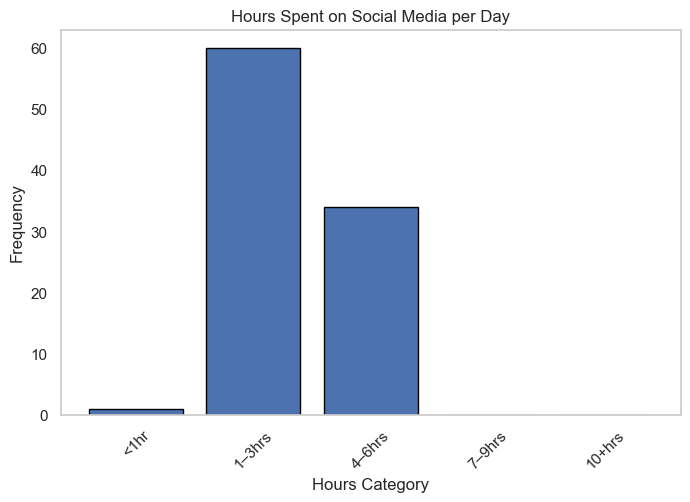

In [21]:
plt.figure(figsize=(8,5))
plt.grid(False)
plt.bar(hours_cat_freq.index, hours_cat_freq.values, edgecolor="black")
plt.title("Hours Spent on Social Media per Day")
plt.xlabel("Hours Category")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [22]:
#Social media usage by gender
ct_sex = pd.crosstab(df["Gender"], df["hours_cat"])
print("Cross-tabulation: Usage by Sex")
print(ct_sex)

ct_sex_percent = pd.crosstab(df["Gender"], df["hours_cat"], normalize="index") * 100
print("\nRow Percentages (%):")
print(ct_sex_percent.round(1))


Cross-tabulation: Usage by Sex
hours_cat  <1hr  1–3hrs  4–6hrs
Gender                         
Female        0      26      14
Male          1      34      20

Row Percentages (%):
hours_cat  <1hr  1–3hrs  4–6hrs
Gender                         
Female      0.0    65.0    35.0
Male        1.8    61.8    36.4


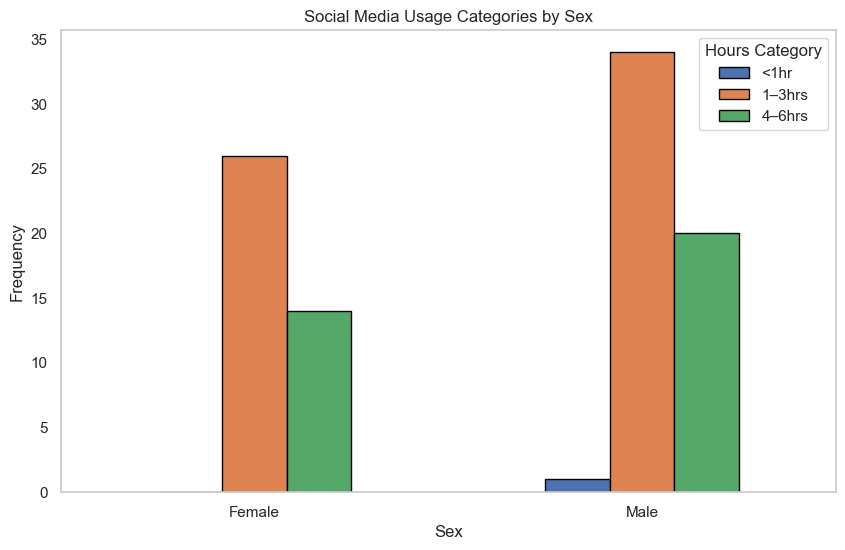

In [23]:
ct_sex.plot(kind="bar", figsize=(10,6), edgecolor="black")
plt.grid(False)
plt.title("Social Media Usage Categories by Sex")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(title="Hours Category")
plt.show()

In [24]:
#Usage by year of study
ct_year = pd.crosstab(df["Year"], df["hours_cat"])
print("Cross-tabulation: Usage by Year of Study")
print(ct_year)

ct_year_percent = pd.crosstab(df["Year"], df["hours_cat"], normalize="index") * 100
print("\nRow Percentages (%):")
print(ct_year_percent.round(1))

Cross-tabulation: Usage by Year of Study
hours_cat  <1hr  1–3hrs  4–6hrs
Year                           
1st Year      0      11      14
2nd Year      0      16       7
3rd Year      0      21       8
4th Year      1      12       5

Row Percentages (%):
hours_cat  <1hr  1–3hrs  4–6hrs
Year                           
1st Year    0.0    44.0    56.0
2nd Year    0.0    69.6    30.4
3rd Year    0.0    72.4    27.6
4th Year    5.6    66.7    27.8


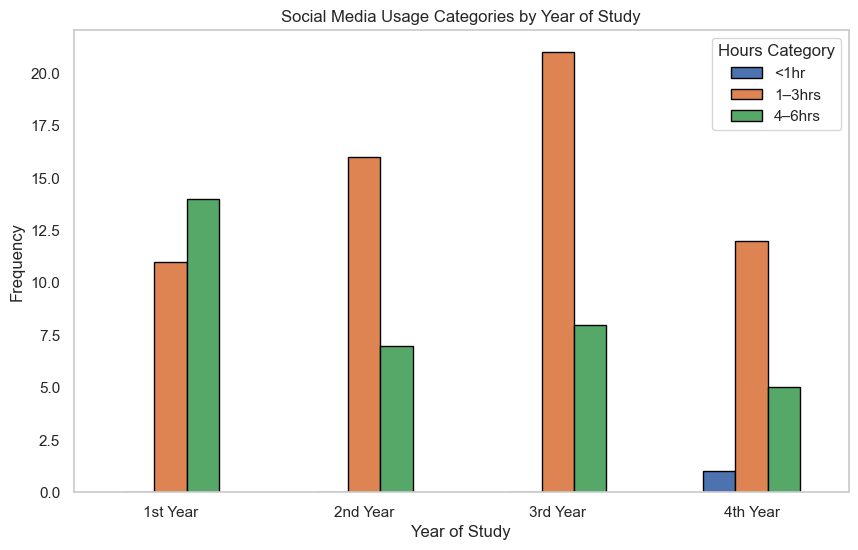

In [25]:
ct_year.plot(kind="bar", figsize=(10,6), edgecolor="black")
plt.grid(False)
plt.title("Social Media Usage Categories by Year of Study")
plt.xlabel("Year of Study")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(title="Hours Category", loc="upper right")
plt.show()

In [26]:
#Usage by place of residence
ct_res = pd.crosstab(df["Residence"], df["hours_cat"])
print("Cross-tabulation: Usage by Residence")
print(ct_res)

ct_res_percent = pd.crosstab(df["Residence"], df["hours_cat"], normalize="index") * 100
print("\nRow Percentages (%):")
print(ct_res_percent.round(1))

Cross-tabulation: Usage by Residence
hours_cat   <1hr  1–3hrs  4–6hrs
Residence                       
Off-campus     0      29      16
On-campus      1      31      18

Row Percentages (%):
hours_cat   <1hr  1–3hrs  4–6hrs
Residence                       
Off-campus   0.0    64.4    35.6
On-campus    2.0    62.0    36.0


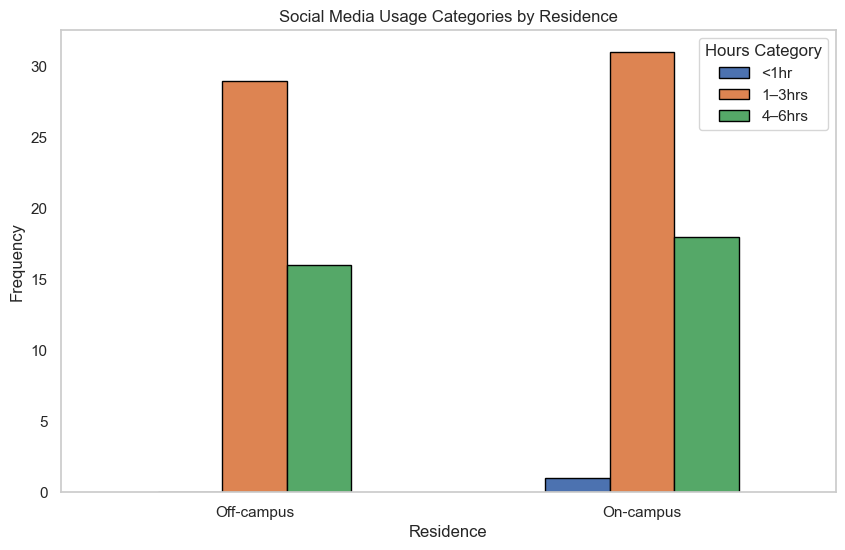

In [27]:
ct_res.plot(kind="bar", figsize=(10,6), edgecolor="black")
plt.grid(False)
plt.title("Social Media Usage Categories by Residence")
plt.xlabel("Residence")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(title="Hours Category")
plt.show()

In [28]:
#Objective 2
pss_cols = [col for col in df.columns if "stress" in col.lower() or "pss" in col.lower() or "q" in col.lower()]

pss_cols

['Stressed', 'Influences_stress']

In [29]:
#Descriptive stats
pss_cols = [
    "Upset_of_something", 
    "Unable_to_control", 
    "Stressed", 
    "Handling_problems",
    "Going_right", 
    "Not_coping", 
    "Controlling_irritations", 
    "On_top",
    "Angered", 
    "Difficulties_in_overcoming"
]

# Ensure numeric
pss_df = df[pss_cols].apply(pd.to_numeric, errors='coerce')

# Compute descriptive statistics
pss_stats = pss_df.describe().T[["mean", "std", "min", "max", "count"]]
pss_stats.columns = ["Mean", "SD", "Min", "Max", "N"]
pss_stats = pss_stats.round(2)

# Sort by Mean (highest = more frequent stress)
pss_sorted = pss_stats.sort_values(by="Mean", ascending=False)

print("PSS Item Descriptive Statistics (sorted by mean):")
display(pss_sorted)

# Top 3 highest and lowest symptoms
top3 = pss_sorted.head(3)
bottom3 = pss_sorted.tail(3).sort_values(by="Mean")

print("\nTop 3 Highest-Rated Stress Symptoms:")
display(top3)

print("\nTop 3 Lowest-Rated Stress Symptoms:")
display(bottom3)


PSS Item Descriptive Statistics (sorted by mean):


,Mean,SD,Min,Max,N
Stressed,2.67,1.20,0.0,4.0,233.0
Handling_problems,2.66,1.17,0.0,4.0,233.0
Angered,2.44,1.17,0.0,4.0,233.0
Controlling_irritations,2.42,1.15,0.0,4.0,233.0
Difficulties_in_overcoming,2.42,1.20,0.0,4.0,233.0
Unable_to_control,2.35,1.18,0.0,4.0,233.0
Not_coping,2.34,1.16,0.0,4.0,233.0
Going_right,2.27,1.12,0.0,4.0,233.0
Upset_of_something,2.21,1.15,0.0,4.0,233.0
On_top,2.21,1.21,0.0,4.0,233.0



Top 3 Highest-Rated Stress Symptoms:


,Mean,SD,Min,Max,N
Stressed,2.67,1.20,0.0,4.0,233.0
Handling_problems,2.66,1.17,0.0,4.0,233.0
Angered,2.44,1.17,0.0,4.0,233.0



Top 3 Lowest-Rated Stress Symptoms:


,Mean,SD,Min,Max,N
Upset_of_something,2.21,1.15,0.0,4.0,233.0
On_top,2.21,1.21,0.0,4.0,233.0
Going_right,2.27,1.12,0.0,4.0,233.0


In [30]:
#4.5.2
reverse_items = ["Handling_problems", "Going_right", "Controlling_irritations", "On_top"]

for item in reverse_items:
    df[item + "_rev"] = 4 - df[item]   # reverse scoring (0→4, 1→3, 2→2, 3→1, 4→0)

# Items that stay in original direction
normal_items = [
    "Upset_of_something",
    "Unable_to_control",
    "Stressed",
    "Not_coping",
    "Angered",
    "Difficulties_in_overcoming"
]

# Combine normal + reversed versions
pss_total_items = normal_items + [
    "Handling_problems_rev",
    "Going_right_rev",
    "Controlling_irritations_rev",
    "On_top_rev"
]

# Compute total PSS score
df["PSS_total"] = df[pss_total_items].sum(axis=1)

# Preview
df["PSS_total"].head()


0    22.0
1    20.0
2    28.0
3    17.0
4    16.0
Name: PSS_total, dtype: float64

In [31]:
#Descriptve stats
pss_total_summary = df["PSS_total"].describe()
print(pss_total_summary)

print("\nMean:", df["PSS_total"].mean())
print("Standard Deviation:", df["PSS_total"].std())
print("Minimum:", df["PSS_total"].min())
print("Maximum:", df["PSS_total"].max())

count    233.000000
mean      20.875536
std        5.834422
min        3.000000
25%       18.000000
50%       21.000000
75%       24.000000
max       40.000000
Name: PSS_total, dtype: float64

Mean: 20.875536480686694
Standard Deviation: 5.834421697378795
Minimum: 3.0
Maximum: 40.0


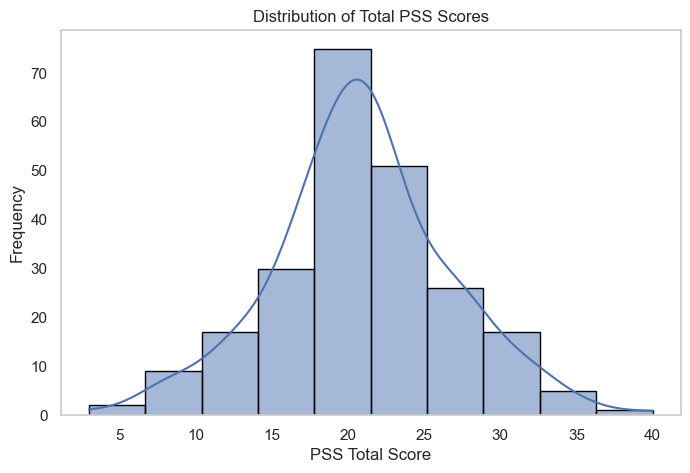

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(df["PSS_total"], kde=True, bins=10, edgecolor='black')
plt.title("Distribution of Total PSS Scores")
plt.xlabel("PSS Total Score")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

In [33]:
#4.5.3
df["Stress_Level"] = pd.cut(
    df["PSS_total"],
    bins=[-1, 13, 26, 40],
    labels=["Low", "Moderate", "High"]
)

df["Stress_Level"].value_counts()

Stress_Level
Moderate    170
High         38
Low          25
Name: count, dtype: int64

In [34]:
# Frequency
stress_freq = df["Stress_Level"].value_counts().sort_index()

stress_percent = (df["Stress_Level"].value_counts(normalize=True).sort_index() * 100).round(1)

stress_table = pd.DataFrame({
    "Frequency": stress_freq,
    "Percent (%)": stress_percent
})

print(stress_table)


              Frequency  Percent (%)
Stress_Level                        
Low                  25         10.7
Moderate            170         73.0
High                 38         16.3


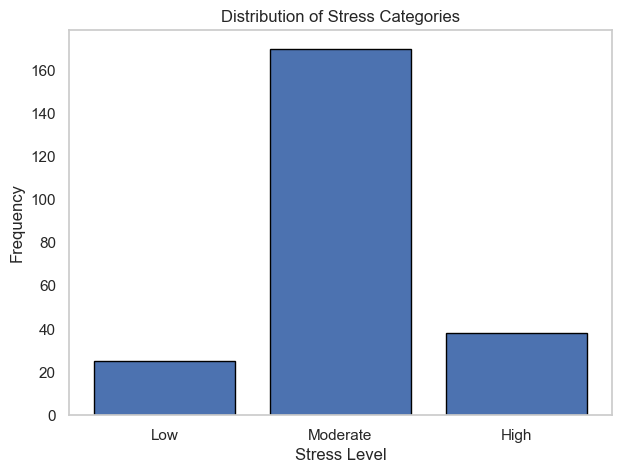

In [35]:
plt.figure(figsize=(7,5))
plt.bar(stress_freq.index, stress_freq.values, edgecolor="black")
plt.title("Distribution of Stress Categories")
plt.xlabel("Stress Level")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

In [36]:
#4.5.4
#stress by gender
ct_sex_stress = pd.crosstab(df["Gender"], df["Stress_Level"])
print(ct_sex_stress)

ct_sex_stress_percent = pd.crosstab(df["Gender"], df["Stress_Level"], normalize="index") * 100
print("\nRow Percentages (%):")
print(ct_sex_stress_percent.round(1))


Stress_Level  Low  Moderate  High
Gender                           
Female          6        57    20
Male           19       113    18

Row Percentages (%):
Stress_Level   Low  Moderate  High
Gender                            
Female         7.2      68.7  24.1
Male          12.7      75.3  12.0


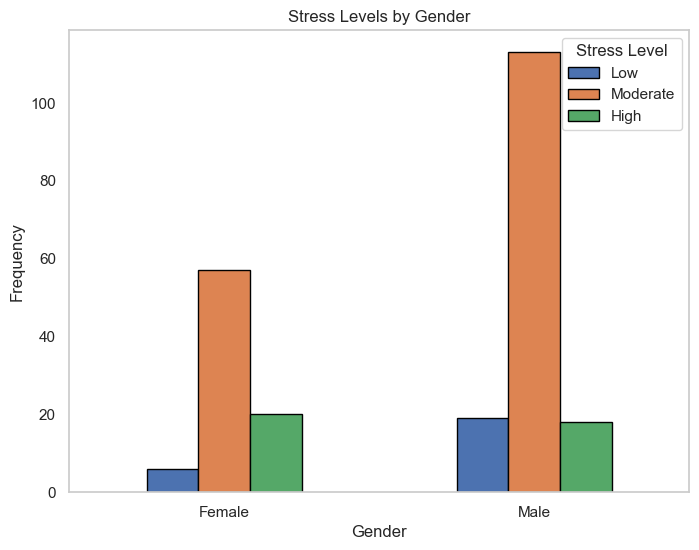

In [37]:
ct_sex_stress.plot(kind="bar", figsize=(8,6), edgecolor="black")
plt.grid(False)
plt.title("Stress Levels by Gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(title="Stress Level")
plt.show()

In [38]:
#Stress by year of study
ct_year_stress = pd.crosstab(df["Year"], df["Stress_Level"])
print(ct_year_stress)

ct_year_stress_percent = pd.crosstab(df["Year"], df["Stress_Level"], normalize="index") * 100
print("\nRow Percentages (%):")
print(ct_year_stress_percent.round(1))

Stress_Level  Low  Moderate  High
Year                             
1st Year        8        44    11
2nd Year        5        35    15
3rd Year        7        43     7
4th Year        5        48     5

Row Percentages (%):
Stress_Level   Low  Moderate  High
Year                              
1st Year      12.7      69.8  17.5
2nd Year       9.1      63.6  27.3
3rd Year      12.3      75.4  12.3
4th Year       8.6      82.8   8.6


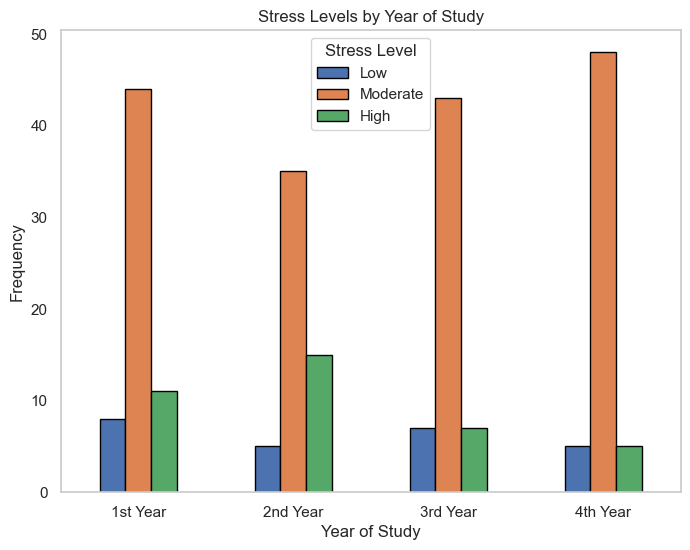

In [39]:
ct_year_stress.plot(kind="bar", figsize=(8,6), edgecolor="black")
plt.grid(False)
plt.title("Stress Levels by Year of Study")
plt.xlabel("Year of Study")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(title="Stress Level")
plt.show()

In [40]:
#Stress by Residence]
ct_res_stress = pd.crosstab(df["Residence"], df["Stress_Level"])
print(ct_res_stress)

ct_res_stress_percent = pd.crosstab(df["Residence"], df["Stress_Level"], normalize="index") * 100
print("\nRow Percentages (%):")
print(ct_res_stress_percent.round(1))

Stress_Level  Low  Moderate  High
Residence                        
Off-campus     18        90    26
On-campus       7        80    12

Row Percentages (%):
Stress_Level   Low  Moderate  High
Residence                         
Off-campus    13.4      67.2  19.4
On-campus      7.1      80.8  12.1


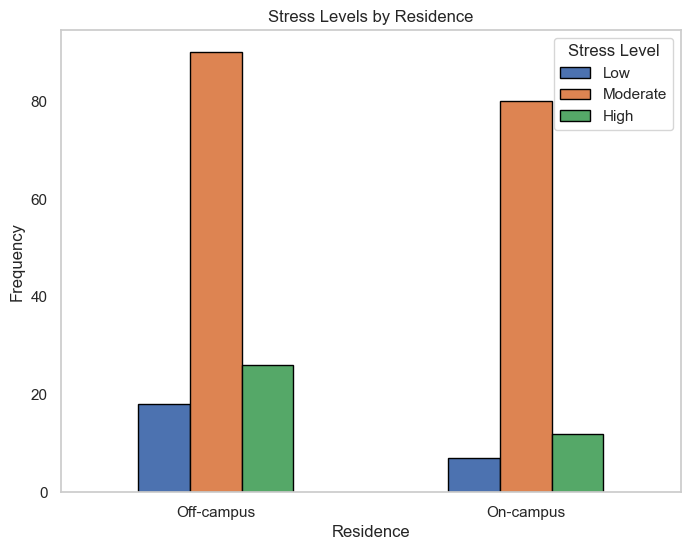

In [41]:
ct_res_stress.plot(kind="bar", figsize=(8,6), edgecolor="black")
plt.grid(False)
plt.title("Stress Levels by Residence")
plt.xlabel("Residence")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(title="Stress Level")
plt.show()

In [42]:
#Objective 3
df["hours_cat"]
df["Stress_Level"]

0      Moderate
1      Moderate
2          High
3      Moderate
4      Moderate
         ...   
228    Moderate
229    Moderate
230    Moderate
231        High
232    Moderate
Name: Stress_Level, Length: 233, dtype: category
Categories (3, object): ['Low' < 'Moderate' < 'High']

In [43]:
#4.6.1 Chi-Square Test of Independence
ct_usage_stress = pd.crosstab(df["hours_cat"], df["Stress_Level"])
print("Cross-tabulation:")
print(ct_usage_stress)

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(ct_usage_stress)

print("\nChi-square Statistic:", round(chi2, 3))
print("Degrees of Freedom:", dof)
print("p-value:", round(p, 4))

print("\nExpected Frequencies:")
print(expected)


Cross-tabulation:
Stress_Level  Low  Moderate  High
hours_cat                        
<1hr            0         1     0
1–3hrs          3        51     6
4–6hrs          5        23     6

Chi-square Statistic: 4.53
Degrees of Freedom: 4
p-value: 0.339

Expected Frequencies:
[[ 0.08421053  0.78947368  0.12631579]
 [ 5.05263158 47.36842105  7.57894737]
 [ 2.86315789 26.84210526  4.29473684]]


In [44]:
#4.6.2
from scipy.stats import pearsonr

# Pearson correlation between hours spent and total PSS score
r_value, p_value = pearsonr(df["hours_numeric"], df["PSS_total"])

print("Pearson r:", r_value)
print("p-value:", p_value)


Pearson r: nan
p-value: nan


In [45]:
gender_map = {"Female": 0, "Male": 1}
df["Gender_num"] = df["Gender"].map(gender_map)

year_map = {
    "1st Year": 1,
    "2nd Year": 2,
    "3rd Year": 3,
    "4th Year": 4
}

df["Year_num"] = df["Year"].map(year_map)


res_map = {"On-campus": 0, "Off-campus": 1}
df["Residence_num"] = df["Residence"].map(res_map)




In [46]:
reverse_items = ["Handling_problems", "Going_right", "Controlling_irritations", "On_top"]

for item in reverse_items:
    df[item + "_rev"] = 4 - df[item]

pss_items = [
    "Upset_of_something",
    "Unable_to_control",
    "Stressed",
    "Handling_problems_rev",
    "Going_right_rev",
    "Not_coping",
    "Controlling_irritations_rev",
    "On_top_rev",
    "Angered",
    "Difficulties_in_overcoming"
]

df["PSS_total"] = df[pss_items].sum(axis=1)

df_model = df[[
    "PSS_total",
    "hours_numeric",
    "Age",
    "Gender_num",
    "Year_num",
    "Residence_num"
]].dropna()

In [47]:
#4.7.2 Regression
import pandas as pd
import statsmodels.api as sm

X = df_model[["hours_numeric", "Age", "Gender_num", "Year_num", "Residence_num"]]
X = sm.add_constant(X)

y = df_model["PSS_total"]

model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:              PSS_total   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.097
Date:                Mon, 08 Dec 2025   Prob (F-statistic):              0.368
Time:                        14:46:20   Log-Likelihood:                -289.32
No. Observations:                  95   AIC:                             590.6
Df Residuals:                      89   BIC:                             606.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.9866      9.939      1.407

In [48]:
coef_table = pd.DataFrame({
    "Coefficient (β)": model.params,
    "Std. Error": model.bse,
    "t-value": model.tvalues,
    "p-value": model.pvalues
}).round(4)

print(coef_table)


               Coefficient (β)  Std. Error  t-value  p-value
const                  13.9866      9.9386   1.4073   0.1628
hours_numeric          -0.1125      0.9498  -0.1184   0.9060
Age                     0.4624      0.4885   0.9466   0.3464
Gender_num             -2.7089      1.2069  -2.2445   0.0273
Year_num               -0.4284      0.6798  -0.6302   0.5302
Residence_num           0.9430      1.1742   0.8031   0.4240


In [49]:
#Assumption test
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

# Fit model
X = df_model[["hours_numeric", "Age", "Gender_num", "Year_num", "Residence_num"]]
X = sm.add_constant(X)
y = df_model["PSS_total"]

model = sm.OLS(y, X).fit()
residuals = model.resid
fitted = model.fittedvalues


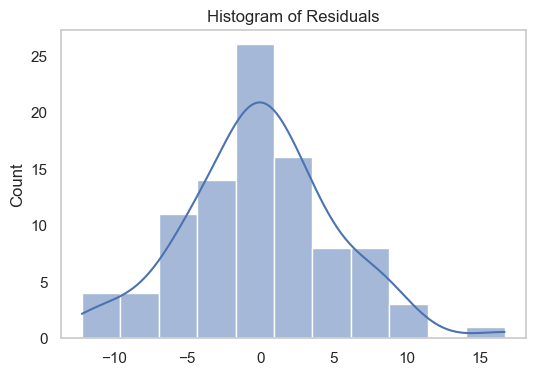

ShapiroResult(statistic=np.float64(0.9872551927099964), pvalue=np.float64(0.49275258650104836))

In [50]:
# Histogram
plt.figure(figsize=(6,4))
plt.grid(False)
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

# Shapiro-Wilk test
shapiro(residuals)


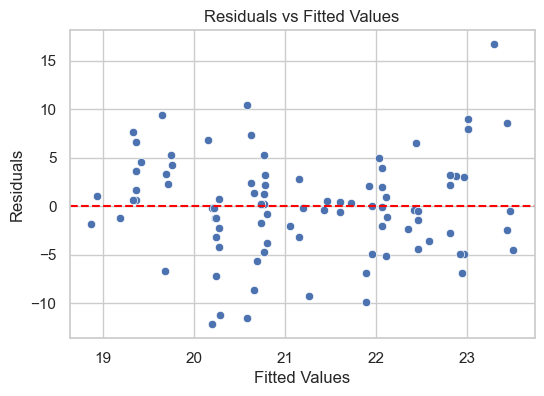

In [51]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


In [52]:
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df)


        Variable         VIF
0          const  339.843931
1  hours_numeric    1.074363
2            Age    1.831387
3     Gender_num    1.221653
4       Year_num    1.826754
5  Residence_num    1.182679
